# 基于Networkx的网络分析和绘图

Aug 5, 2024, Hans Cao

NetworkX 是一个用于创建、操作和研究复杂网络结构的 Python 库。它提供了丰富的功能，用于构建各种类型的图（无向图、有向图、加权图等），并支持许多网络分析和算法，包括路径搜索、中心性计算、社区检测、网络可视化等。

下面是一个示例

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

class MyGraph():
    def __init__(self, adj_matrix):
        """
        adj_matrix: 邻接矩阵
        """
        self.adj_matrix = adj_matrix
        self.init_graph()
        
    def init_graph(self):
        self.g = nx.DiGraph()  # 有向图
        node_labels = self.adj_matrix.columns.values
        self.g.add_nodes_from(node_labels)
        
        for i in range(self.adj_matrix.shape[0]):
            for j in range(self.adj_matrix.shape[1]):
                weight = self.adj_matrix.iloc[i, j]
                if weight != 0 and not np.isnan(weight):
                    self.g.add_edge(node_labels[i], node_labels[j], weight=weight)

    def profile(self):
        """
        describe network with key indicators
        """
        print('stats profile...')
        g = self.g
        properties_dict = {
            "节点数": g.number_of_nodes(),
            "边数": g.number_of_edges(),
            '是否有向': g.is_directed(),
            '是否加权': nx.is_weighted(g),
            "节点度数": dict(g.degree()),
            '最大度': max(dict(g.degree()).values()),
            '平均度': round(sum(dict(g.degree()).values()) / float(g.number_of_nodes()), 5),
            "网络直径": round(nx.diameter(g), 5) if nx.is_connected(g.to_undirected()) else 'N/A',
            "平均路径长度": round(nx.average_shortest_path_length(g), 5) if nx.is_connected(g.to_undirected()) else 'N/A',
            "加权度中心性": nx.degree_centrality(g),
            "接近中心性": nx.closeness_centrality(g),
            "中介中心性": nx.betweenness_centrality(g),
            '特征向量中心性': nx.eigenvector_centrality(g, max_iter=1000),
            '平均介数中心性betweenness': round(np.mean(list(nx.betweenness_centrality(g).values())), 5),
            '平均接近中心性closeness': round(np.mean(list(nx.closeness_centrality(g).values())), 5),
            '聚类系数': round(nx.average_clustering(g.to_undirected()), 5),
        }
        return properties_dict

    def plot_adj_matrix_hist(self, figsize=(6, 4)):
        """
        plot histogram of adj-matrix
        """
        pd.DataFrame(self.adj_matrix.values.flatten()).hist(figsize=figsize)

    def plot_circle(self, figsize=(6, 4), vertex_color="lightblue"):
        """
        plot network at form of "circle"
        """
        pos = nx.circular_layout(self.g)
        plt.figure(figsize=figsize)
        nx.draw(self.g, pos, with_labels=True, node_color=vertex_color, edge_color="grey", node_size=500, font_size=10)
        plt.show()

    def plot_clusters(self, figsize=(6,4), vertex_size=0.5, edge_width=0.7):
        """
        plot network at form of "clusters"
        """
        plt.figure(figsize=figsize)
        components = list(nx.connected_components(self.g.to_undirected()))
        color_map = plt.cm.get_cmap('rainbow', len(components))
        for i, component in enumerate(components):
            subgraph = self.g.subgraph(component)
            pos = nx.spring_layout(subgraph)
            nx.draw(subgraph, pos, node_color=[color_map(i)] * len(subgraph), with_labels=True, node_size=vertex_size * 1000, edge_color="grey", width=edge_width)
        plt.show()

    def communities_clustering(self):
        """
        使用边介数法进行社区检测
        """
        communities = nx.community.girvan_newman(self.g)
        top_level_communities = next(communities)
        clusters = sorted(map(sorted, top_level_communities))
        print("社区划分:", clusters)


示例

In [3]:
# 示例用法
adj_matrix = pd.DataFrame({
    'A': [0, 1.2, 0, 0],
    'B': [1, 0, 1, 0],
    'C': [0, 5.4, 0, 1],
    'D': [0, 0, 1, 0]
}, index=['A', 'B', 'C', 'D'])

my_graph = MyGraph(adj_matrix)
profile = my_graph.profile()
print(profile)
# my_graph.plot_adj_matrix_hist()
# my_graph.plot_circle()
# my_graph.plot_clusters()
# my_graph.communities_clustering()

stats profile...
{'节点数': 4, '边数': 6, '是否有向': True, '是否加权': True, '节点度数': {'A': 2, 'B': 4, 'C': 4, 'D': 2}, '最大度': 4, '平均度': 3.0, '网络直径': 3, '平均路径长度': 1.66667, '加权度中心性': {'A': 0.6666666666666666, 'B': 1.3333333333333333, 'C': 1.3333333333333333, 'D': 0.6666666666666666}, '接近中心性': {'A': 0.5, 'B': 0.75, 'C': 0.75, 'D': 0.5}, '中介中心性': {'A': 0.0, 'B': 0.6666666666666666, 'C': 0.6666666666666666, 'D': 0.0}, '特征向量中心性': {'A': 0.37174823427120085, 'B': 0.6015008315175003, 'C': 0.6015008315175004, 'D': 0.3717482342712008}, '平均介数中心性betweenness': 0.33333, '平均接近中心性closeness': 0.625, '聚类系数': 0.0}


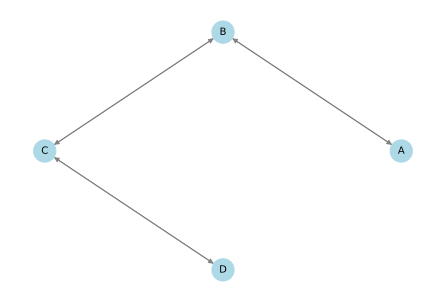

In [4]:
my_graph.plot_circle()

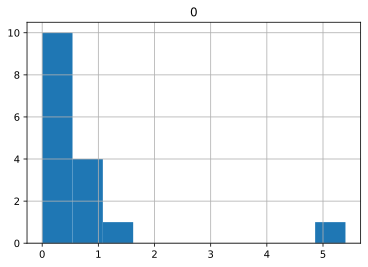

In [5]:
my_graph.plot_adj_matrix_hist()

In [8]:
my_graph.communities_clustering()

社区划分: [['A', 'B'], ['C', 'D']]
